# Data Preparation

### Import the libraries

In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# Statistical functions
from scipy.stats import skew, kurtosis, zscore, mstats

# Machine learning and model evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Deep learning (LSTM, GRU, etc.)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


### Create DataFrame

In [3]:
df = pd.read_csv('bitcoin_2017_to_2023.csv')

## EDA of the DataSet

In this section, we will perform an Exploratory Data Analysis (EDA) on our dataset to gain insights into the structure, distribution, and relationships between the variables. Below is a brief description of the columns in our dataset:

| **Column**                   | **Description**                                                    |
|------------------------------|--------------------------------------------------------------------|
| `timestamp`                  | Timestamp of the data point.                                       |
| `open`                       | Opening price for that timestamp.                                  |
| `high`                       | Highest price during the timestamp interval.                       |
| `low`                        | Lowest price during the timestamp interval.                        |
| `close`                      | Closing price for the timestamp interval.                          |
| `volume`                     | Volume of trades for the specified timestamp range.                |
| `quote_asset_volume`         | Quote asset volume for the specified timestamp range.              |
| `number_of_trades`           | Number of trades executed during the specified timestamp range.    |
| `taker_buy_base_asset_volume`| Volume of the base asset bought by takers during the timestamp range. |
| `taker_buy_quote_asset_volume`| Volume of the quote asset bought by takers during the timestamp range. |


### Understanding the Structure of the Dataset

In [4]:
#Exploring the head of the dataset
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [5]:
#Exploring the random sample
df.sample(10)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
358427,2022-11-25 20:52:00,16536.86,16538.55,16530.00,16530.77,104.968660,1.735460e+06,2306,42.787640,7.074260e+05
1104260,2021-06-25 23:22:00,31494.50,31511.07,31442.23,31497.29,25.492501,8.025883e+05,914,14.400595,4.533782e+05
950083,2021-10-11 07:29:00,56716.74,56750.00,56673.00,56677.72,65.662550,3.723505e+06,1306,36.516250,2.070830e+06
2479381,2018-11-11 17:55:00,6397.97,6398.99,6396.84,6398.94,4.856729,3.107256e+04,76,1.593168,1.019328e+04
1507734,2020-09-18 06:27:00,10907.92,10910.33,10907.91,10908.82,27.094347,2.955756e+05,344,13.611895,1.484932e+05
2245395,2019-04-23 11:24:00,5512.50,5512.50,5505.00,5505.51,27.046799,1.489852e+05,171,5.751826,3.169085e+04
2198947,2019-05-26 03:32:00,7983.75,7990.18,7982.64,7989.09,7.149092,5.709578e+04,105,3.406492,2.720703e+04
372345,2022-11-16 04:54:00,16912.87,16916.97,16908.36,16910.02,100.679650,1.702757e+06,2967,47.600850,8.050867e+05
2044081,2019-09-11 01:39:00,10115.99,10121.51,10115.89,10121.48,12.653842,1.280482e+05,120,11.524015,1.166144e+05
233254,2023-02-20 12:25:00,24832.10,24838.14,24824.11,24824.39,145.246880,3.606697e+06,5745,72.172440,1.792220e+06


In [6]:
#Exploring the tail of the dataset
df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


In [7]:
# Exploring the shape of the dataset
df.shape

(3126000, 10)

This dataset has over 3 Million instances and 10 featuers

In [8]:
# Shows general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


As we can see, the timestap type is 'object' which we will convert to 'datetime' later.

In [9]:
# Explore unique values of each feature
df.nunique()

timestamp                       3123928
open                            1784709
high                            1658845
low                             1666834
close                           1775966
volume                          2997695
quote_asset_volume              3099988
number_of_trades                  18985
taker_buy_base_asset_volume     2869878
taker_buy_quote_asset_volume    3063768
dtype: int64

In [10]:
# Find all of the missing values
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

As we can see, the dataset has no missing values!

### Data Distributions for Numerical Variables

In [11]:
# Important stats on each variable
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


Some general information that will be explored in detail later.

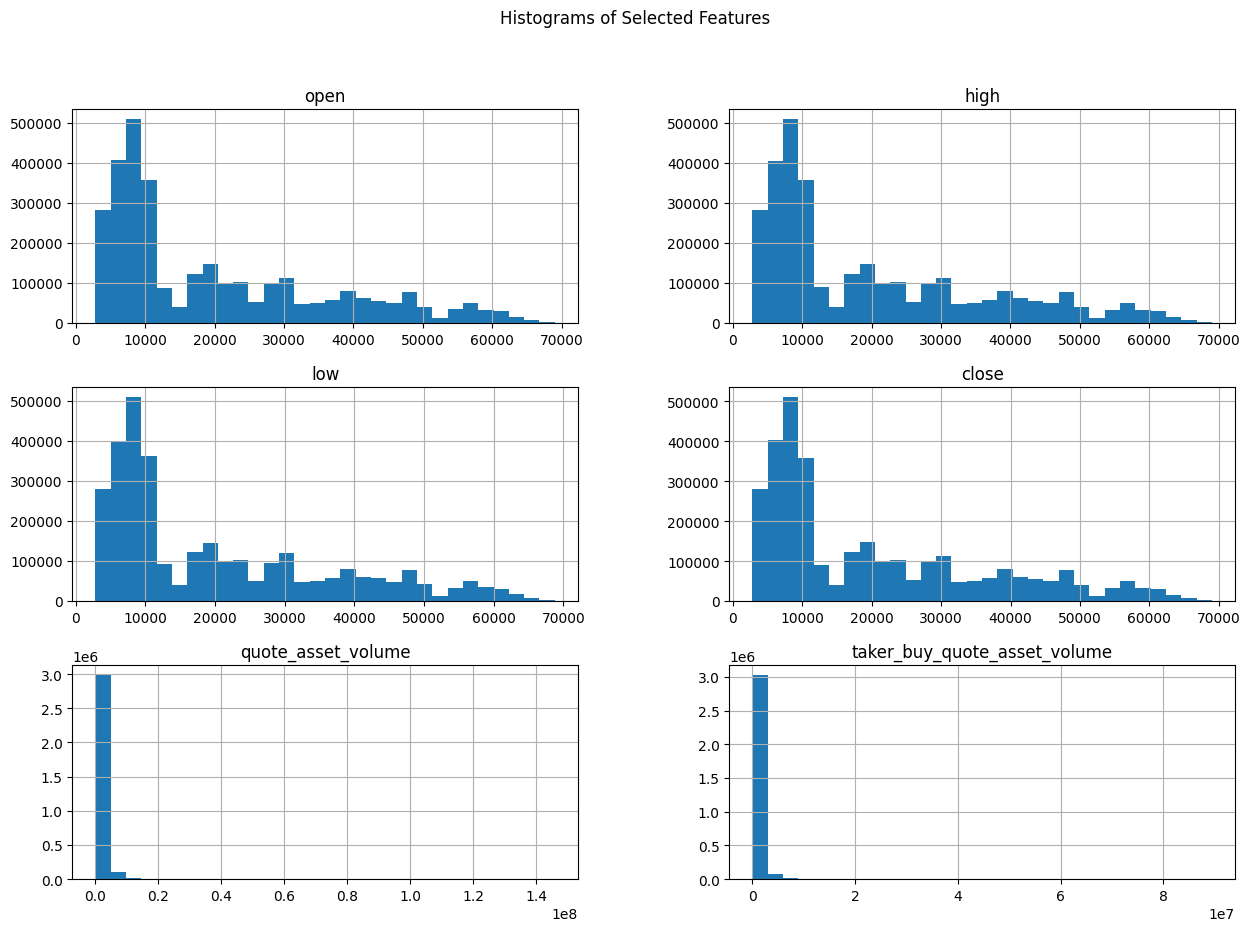

In [12]:
# Plotting Histograms for Numerical Featuers
# Features for histograms
hist_features = ['open', 'high', 'low', 'close', 'quote_asset_volume', 'taker_buy_quote_asset_volume']

# Plot histograms
df[hist_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

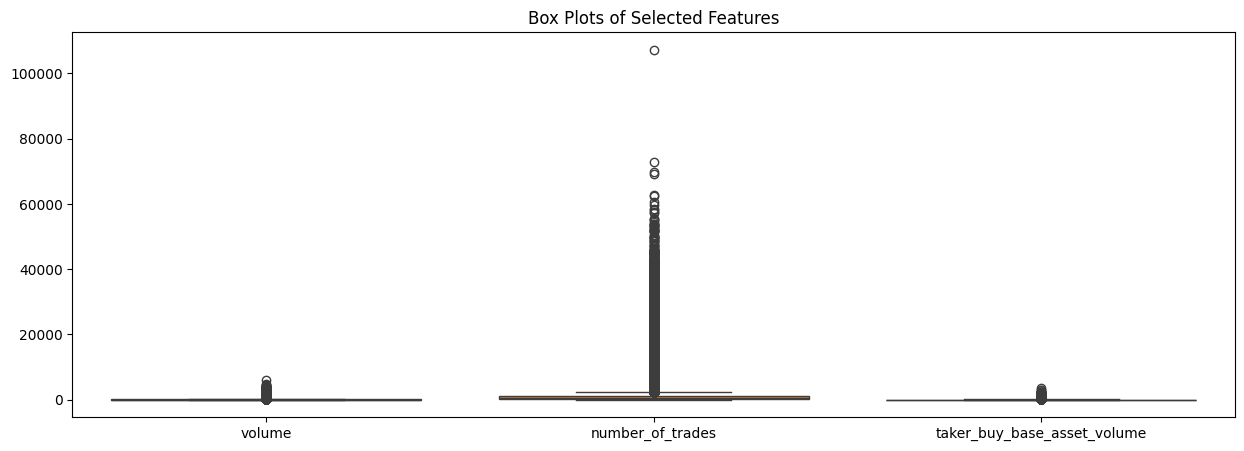

In [13]:
# Plot box plots to identify outliers
# Features for box plots
boxplot_features = ['volume', 'number_of_trades', 'taker_buy_base_asset_volume']

# Plot box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[boxplot_features])
plt.title('Box Plots of Selected Features')
plt.show()

<b>Mean and Standard Deviation:</b>

The average open, high, low, and close prices are close to each other, around $20,000, suggesting relatively consistent pricing across the dataset.
The standard deviation for these prices is around $16,000, indicating significant price fluctuations.
The volume and quote_asset_volume have high standard deviations, showing variability in trading activity.

<b>Minimum and Maximum Values:</b>

The minimum prices (open, high, low, and close) are as low as $2,817, while the maximum values reach $69,000. This reflects a wide range of market conditions, likely covering multiple market cycles (e.g., bull and bear periods).
There are timestamps where volume, quote_asset_volume, and number_of_trades are zero, indicating periods of no trading activity.

<b>Quartiles (25%, 50%, 75%):</b>

The 25th percentile (Q1) and 75th percentile (Q3) for the prices show a significant spread, with Q1 around $7,600 and Q3 close to $29,900. This highlights a skewed distribution, with more data points on the lower end and some high outliers.
The median (50%) values for the prices are around $11,700, which is lower than the mean, indicating a positive skew (i.e., a few high values increasing the average).
The volume and taker buy volumes are generally low in the lower quartiles but increase significantly by Q3, indicating periods of increased market activity.

<b>Outliers:</b>

The maximum values for volume (5,877.78), number_of_trades (107,315), and taker buy quote asset volume (89,475,510) are exceptionally high compared to their respective means, suggesting potential outliers or periods of unusually high market activity.

### Visualizing relationships between Variables 

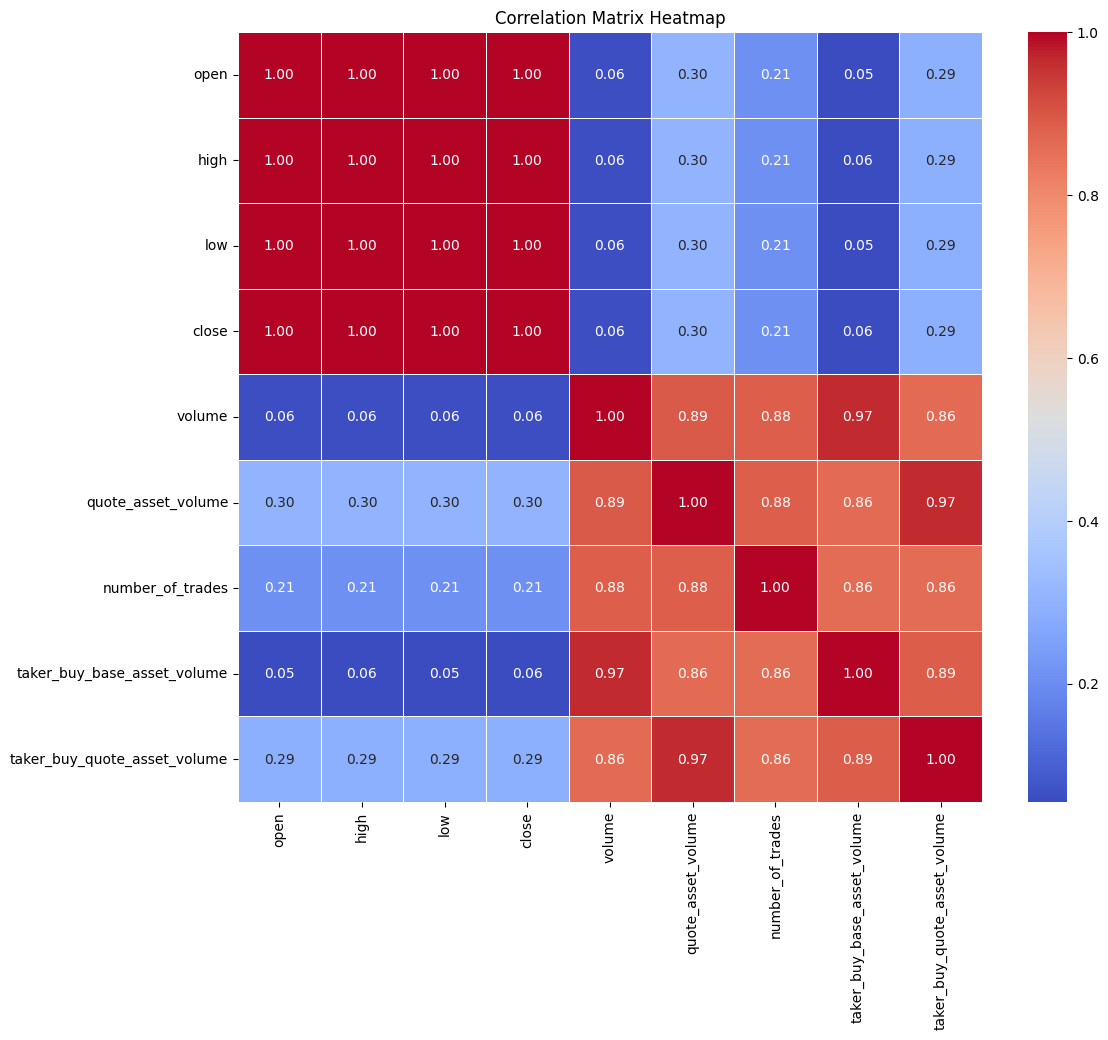

In [14]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

<b>High Correlation Among Price Features:</b>

The open, high, low, and close features have nearly perfect correlations (close to 1.0). This is expected because they are derived from the same price data for each timestamp and often move together in financial datasets.

<b>Volume and Price Features:</b>

volume has a very weak positive correlation (~0.06) with price-related features (open, high, low, close). This suggests that trading volume is not directly tied to price movements, at least in this dataset.

<b>Volume Features:</b>

volume shows a strong positive correlation with taker_buy_base_asset_volume (0.966) and a moderately strong correlation with quote_asset_volume (0.89).
quote_asset_volume and taker_buy_quote_asset_volume also have a very high correlation (0.965), indicating that these two metrics tend to move together.

<b>Trades and Volumes:</b>

number_of_trades has a strong positive correlation with volume (0.883), quote_asset_volume (0.885), and taker_buy_base_asset_volume (0.859). This indicates that higher trading activity often coincides with higher trading volumes.

<b>Relationship Between Taker Buy Volumes:</b>

taker_buy_base_asset_volume and taker_buy_quote_asset_volume have a very high correlation (0.889), as expected, since these features represent similar metrics in different units (base and quote assets).



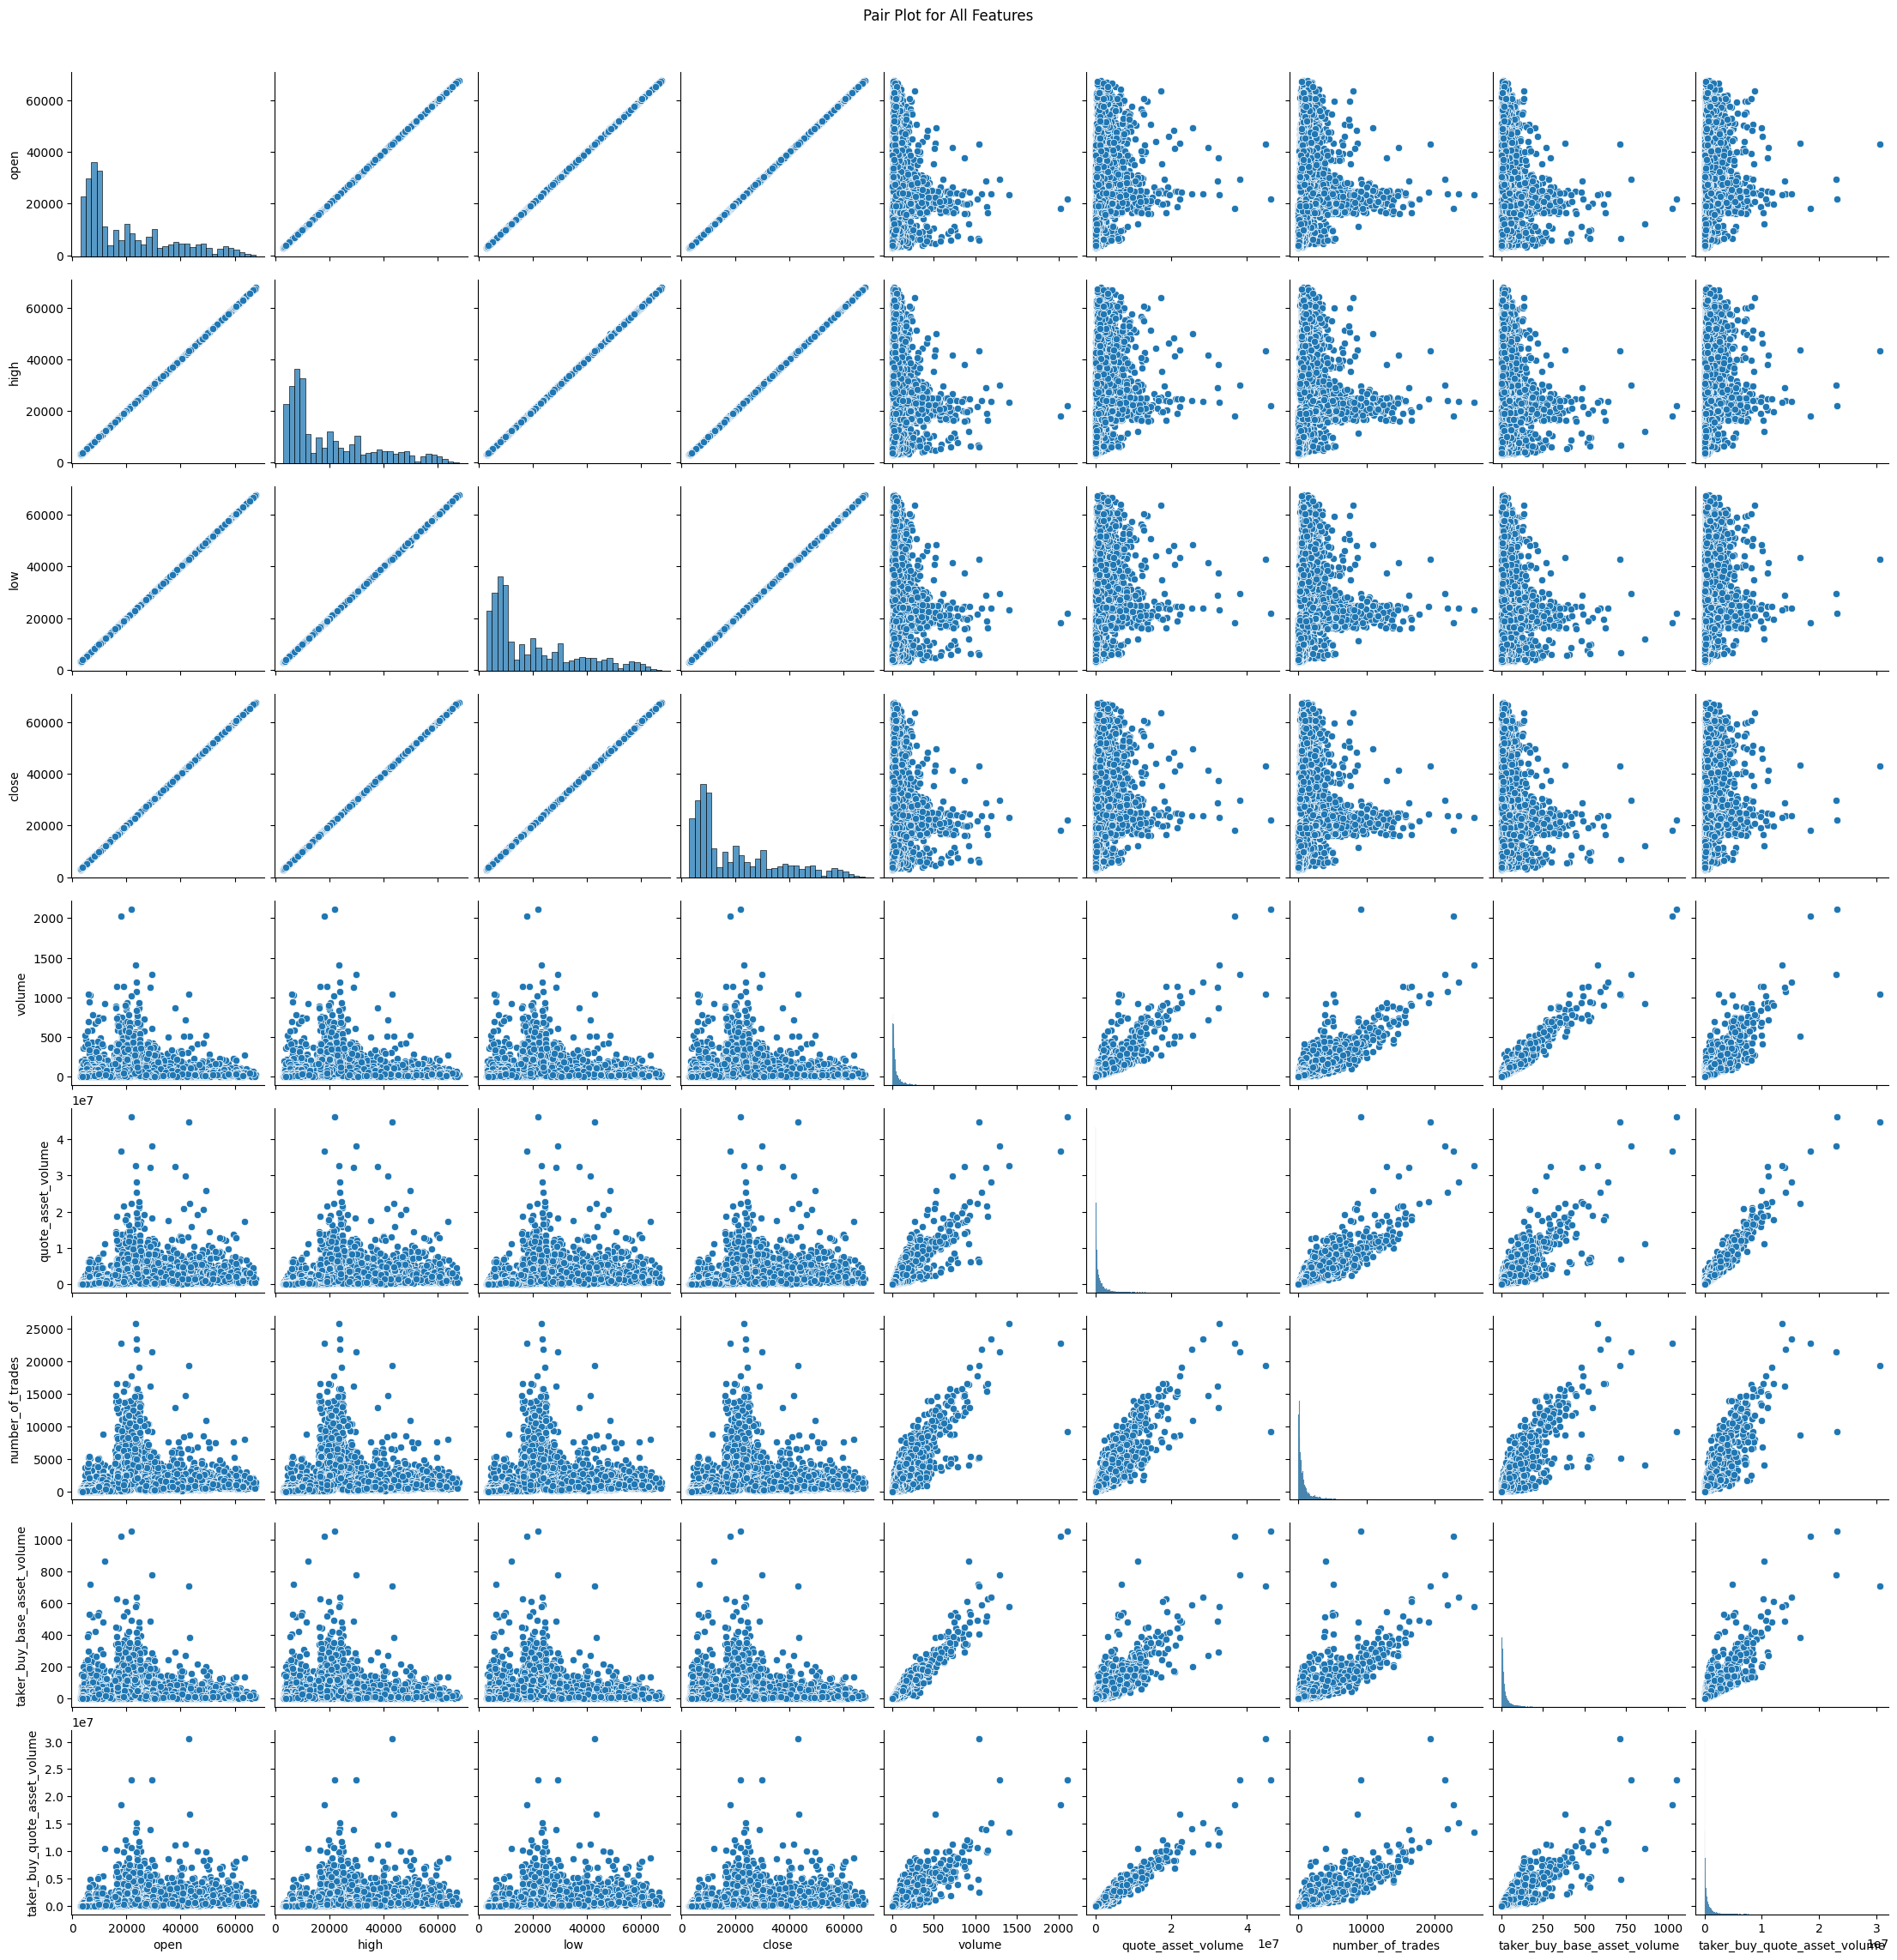

In [15]:
# Visualizing feature relationships

# Use a subset of the data for faster plotting 
sample_df = df.sample(n=10000, random_state=42)

# Create a pair plot
sns.pairplot(sample_df)
plt.suptitle('Pair Plot for All Features', y=1.02)
plt.show()


**Strong Linear Relationships Among Price Columns**
   - The features `open`, `high`, `low`, and `close` are highly correlated, as indicated by the tight diagonal lines in their scatter plots. This behavior is expected since these are related price indicators that typically move together.

**Skewed Distributions**
   - The histograms for `open`, `high`, `low`, and `close` show right-skewed distributions, suggesting the presence of higher values, possibly reflecting recent high prices or market volatility over time.

**Volume and Trade Activity Correlation**
   - Volume-related features (`volume`, `quote_asset_volume`, `taker_buy_base_asset_volume`, and `taker_buy_quote_asset_volume`) exhibit positive correlations among each other. The scatter plots show an upward trend, indicating that higher volumes generally coincide.

**Presence of Outliers**
   - There are visible outliers, especially in the volume-related features. These points might indicate extreme trading activities or unusual market conditions.

**Number of Trades vs Volume**
   - A positive relationship is observed between `number_of_trades` and `volume`, indicating that a higher number of trades often corresponds with increased trading volume.

**Non-linear Trends**
   - Some scatter plots, particularly for volume-related features, display non-linear patterns. This suggests that while there is a general correlation, it might not be strictly linear, indicating potential influences from other factors.



In [16]:
# Define the list of numerical features
numerical_features = [
    'open', 'high', 'low', 'close', 'volume',
    'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
]

# Set a higher threshold multiplier for outlier detection 
threshold = 2  

def detect_outliers(df, numerical_features, threshold):
    outlier_counts = {}
    
    for feature in numerical_features:
        Q1, Q3 = df[feature].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Count the number of outliers for the feature
        count_outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        outlier_counts[feature] = count_outliers

    # Return the outlier counts as a DataFrame
    outlier_counts_df = pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier Count'])
    return outlier_counts_df

outlier_counts_df = detect_outliers(df, numerical_features, threshold=2.5)
print(outlier_counts_df)


                        Feature  Outlier Count
0                          open              0
1                          high              0
2                           low              0
3                         close              0
4                        volume         216664
5            quote_asset_volume         185216
6              number_of_trades         243336
7   taker_buy_base_asset_volume         214449
8  taker_buy_quote_asset_volume         192692


### Data Cleaning


This data has no missing values at all, so there is no need to handle it.

In [17]:
# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for any parsing issues (NaT indicates missing values)
print(df['timestamp'].isna().sum())

0


In [18]:
# Checking the conversion
df.dtypes

timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
dtype: object

As we can see, the `timestamp` has been successfully converted to the `datetime64` type

In [19]:
# Sorting the dataset by the time in ascending order
df = df.sort_values('timestamp', ascending=True)

In [20]:
# Checking the sorting by time
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [21]:
# Handling Outliers
# Apply log transformation
df['log_volume'] = np.log(df['volume'] + 1)
df['log_quote_asset_volume'] = np.log(df['quote_asset_volume'] + 1)
df['log_number_of_trades'] = np.log(df['number_of_trades'] + 1)
df['log_taker_buy_base_asset_volume'] = np.log(df['taker_buy_base_asset_volume'] + 1)
df['log_taker_buy_quote_asset_volume'] = np.log(df['taker_buy_quote_asset_volume'] + 1)

# Apply percentile-based capping to the log-transformed features
df['log_cap_volume'] = df['log_volume'].clip(lower=df['log_volume'].quantile(0.025), upper=df['log_volume'].quantile(0.975))
df['log_cap_quote_asset_volume'] = df['log_quote_asset_volume'].clip(lower=df['log_quote_asset_volume'].quantile(0.025), upper=df['log_quote_asset_volume'].quantile(0.975))
df['log_cap_number_of_trades'] = df['log_number_of_trades'].clip(lower=df['log_number_of_trades'].quantile(0.025), upper=df['log_number_of_trades'].quantile(0.975))
df['log_cap_taker_buy_base_asset_volume'] = df['log_taker_buy_base_asset_volume'].clip(lower=df['log_taker_buy_base_asset_volume'].quantile(0.025), upper=df['log_taker_buy_base_asset_volume'].quantile(0.975))
df['log_cap_taker_buy_quote_asset_volume'] = df['log_taker_buy_quote_asset_volume'].clip(lower=df['log_taker_buy_quote_asset_volume'].quantile(0.025), upper=df['log_taker_buy_quote_asset_volume'].quantile(0.975))



# Detect outliers before and after transformations and capping
transformed_outlier_features = ['log_cap_volume', 'log_cap_quote_asset_volume', 'log_cap_number_of_trades',
                      'log_cap_taker_buy_base_asset_volume', 'log_cap_taker_buy_quote_asset_volume']

outlier_features = ['volume', 'quote_asset_volume', 'number_of_trades',
                'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
]

# Before transformation outliers
outlier_counts_before = detect_outliers(df, outlier_features, threshold=2)
print("Outlier Counts Before Transformation:")
print(outlier_counts_before)

# After transformation and capping outliers
outlier_counts_after_transformation = detect_outliers(df, transformed_outlier_features, threshold=2)
print("\nOutlier Counts After Transformation and Capping:")
print(outlier_counts_after_transformation)


Outlier Counts Before Transformation:
                        Feature  Outlier Count
0                        volume         266222
1            quote_asset_volume         234506
2              number_of_trades         298816
3   taker_buy_base_asset_volume         263758
4  taker_buy_quote_asset_volume         242847

Outlier Counts After Transformation and Capping:
                                Feature  Outlier Count
0                        log_cap_volume              0
1            log_cap_quote_asset_volume              0
2              log_cap_number_of_trades              0
3   log_cap_taker_buy_base_asset_volume              0
4  log_cap_taker_buy_quote_asset_volume              0


After applying log transformation and percentile-based capping, the number of outliers in the features significantly decreased. Initially, the outlier counts for volume-related features were in the hundreds of thousands. After transformation and capping, all features showed zero outliers, indicating effective handling of extreme values.

### Feature Engineering

In [22]:
# Generating features based on the timestamp 
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['timestamp'].dt.weekday >= 5

Date-time features like hour, day of week, month, and weekend status capture temporal patterns that influence market behavior. For example, trading volumes and price volatility vary by time of day, day of week, or season. Including these features improves model accuracy by accounting for time-based trends and human behavior.

In [23]:
df['price_range'] = df['high'] - df['low']
df['price_change'] = df['close'] - df['close'].shift(1)
df['volume_to_trades_ratio'] = df['volume'] / df['number_of_trades']

Price and volume ratios are crucial for understanding market dynamics. The price range indicates volatility, price change captures momentum, and the volume-to-trades ratio reveals liquidity. These features help identify trends, volatility, and market activity, enhancing prediction accuracy for price movements and market behavior.

In [24]:
# Confirm that our variables have been properly added
df[['price_range', 'price_change', 'volume_to_trades_ratio']].head()

,price_range,price_change,volume_to_trades_ratio
3125999,0.0,NaN,0.591728
3125998,0.0,0.00,NaN
3125997,0.0,19.08,0.130537
3125996,0.0,-19.08,0.004003
3125995,0.0,0.00,0.140796


We can see that the first instance has a NaN in `price_change`. That is because this is the first instance and there is no previous value of `low`. Also, `volume_to_trades_ratio` has a NaN in the second instance, as the number of trades is 0 and division by 0 returns NaN, but if there is more than 0 trades, then the volume is non-zero, meaning that we can simply assume that `volume_to_trades_ratio` is 0.

In [25]:
# Replace NaN values without using inplace
df['price_change'] = df['price_change'].fillna(0)
df['volume_to_trades_ratio'] = df['volume_to_trades_ratio'].fillna(0)

# Check the updated values
df[['price_range', 'price_change', 'volume_to_trades_ratio']].head()


,price_range,price_change,volume_to_trades_ratio
3125999,0.0,0.00,0.591728
3125998,0.0,0.00,0.000000
3125997,0.0,19.08,0.130537
3125996,0.0,-19.08,0.004003
3125995,0.0,0.00,0.140796


In [26]:
# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['hour', 'day_of_week', 'month'], drop_first=True)

Encoding categorical variables is crucial for machine learning models, which require numerical inputs. One-hot encoding ensures models understand time-based features like hour, day, or month, capturing meaningful patterns without assuming ordinality. It also prevents multicollinearity by dropping one category, improving model performance and preventing issues with correlated variables. `is_weekend` feature is already a `boolean` type, so it doesn't need to be encoded.

In [27]:
# Confirming the new features are successfully added and categorical variables are encoded properly

print(df[['is_weekend', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']].dtypes)

is_weekend       bool
hour_1           bool
hour_2           bool
hour_3           bool
hour_4           bool
hour_5           bool
hour_6           bool
hour_7           bool
hour_8           bool
hour_9           bool
hour_10          bool
hour_11          bool
hour_12          bool
hour_13          bool
hour_14          bool
hour_15          bool
hour_16          bool
hour_17          bool
hour_18          bool
hour_19          bool
hour_20          bool
hour_21          bool
hour_22          bool
hour_23          bool
day_of_week_1    bool
day_of_week_2    bool
day_of_week_3    bool
day_of_week_4    bool
day_of_week_5    bool
day_of_week_6    bool
month_2          bool
month_3          bool
month_4          bool
month_5          bool
month_6          bool
month_7          bool
month_8          bool
month_9          bool
month_10         bool
month_11         bool
month_12         bool
dtype: object


We can clearly see that our categorical variables were properly encoded and our features have been added correctly.


In [28]:
# Select numerical columns for standardization
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                  'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
                  'log_volume', 'log_quote_asset_volume', 'log_number_of_trades',
                  'log_taker_buy_base_asset_volume', 'log_taker_buy_quote_asset_volume',
                  'log_cap_volume', 'log_cap_quote_asset_volume', 'log_cap_number_of_trades',
                  'log_cap_taker_buy_base_asset_volume', 'log_cap_taker_buy_quote_asset_volume',
                  'price_range', 'price_change', 'volume_to_trades_ratio']

# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check that the dataframe was standardized
df.sample(10)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2412894,2018-12-28 05:02:00,3558.02,3559.42,3558.00,3559.39,15.437689,5.493152e+04,156,13.622425,4.847194e+04,...,False,False,False,False,False,False,False,False,False,True
2319965,2019-03-02 10:34:00,3807.27,3807.29,3802.40,3807.26,27.068675,1.029860e+05,185,8.979930,3.417453e+04,...,True,False,False,False,False,False,False,False,False,False
1244908,2021-03-20 00:00:00,58030.01,58059.20,57958.00,58005.29,93.114043,5.401450e+06,3480,32.915077,1.909478e+06,...,True,False,False,False,False,False,False,False,False,False
2446925,2018-12-04 13:51:00,3992.02,3997.81,3992.01,3993.51,5.953235,2.377823e+04,88,2.573040,1.028111e+04,...,False,False,False,False,False,False,False,False,False,True
2300860,2019-03-15 22:59:00,3916.35,3916.98,3914.33,3914.80,8.561535,3.352453e+04,70,2.714019,1.062647e+04,...,True,False,False,False,False,False,False,False,False,False
2407562,2018-12-31 21:54:00,3672.88,3673.71,3672.53,3673.70,5.257879,1.931356e+04,66,3.320009,1.219516e+04,...,False,False,False,False,False,False,False,False,False,True
1834481,2020-02-03 17:38:00,9282.58,9286.56,9280.56,9281.00,9.405214,8.731013e+04,174,5.559881,5.161238e+04,...,False,False,False,False,False,False,False,False,False,False
1408470,2020-11-26 04:51:00,17807.88,17811.24,17753.47,17766.03,150.826304,2.681190e+06,2267,45.235100,8.043510e+05,...,False,False,False,False,False,False,False,False,True,False
639786,2022-05-14 11:33:00,28834.97,28887.93,28830.71,28862.11,57.770220,1.667581e+06,2197,29.168340,8.419903e+05,...,False,False,True,False,False,False,False,False,False,False
565608,2022-07-04 23:51:00,20276.84,20284.95,20246.61,20254.25,139.400950,2.825055e+06,1062,46.939310,9.512078e+05,...,False,False,False,False,True,False,False,False,False,False


In [29]:
# Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Create lagged features for time series
df['close_lag1'] = df['close'].shift(1)
df['close_lag7'] = df['close'].shift(7)

# Calculate additional features
df['price_range'] = df['high'] - df['low']
df['volume_change'] = df['volume'].pct_change()

# Drop rows with NaN values
df = df.dropna()

By extracting time-based features like hour, day of the week, and month, the model can capture time-dependent patterns. Lagged features such as close_lag1 and close_lag7 help account for autocorrelation, while price range and volume change provide insights into market trends and volatility. Dropping missing values ensures data consistency, improving model accuracy and reliability in predicting Bitcoin prices.

# Model Development



## Model Selection for Bitcoin Price Prediction


### **Problem Type**
The task is a **regression problem** since the objective is to predict a continuous variable (Bitcoin price). This requires regression models capable of handling temporal and multivariate data effectively.

---

### **1. Machine Learning Models**

### **(i) Linear Regression**
- **Strengths**:
  - Simple and interpretable.
  - Useful as a baseline model for comparison.
  - Works well if the data has a linear relationship between features and the target.
- **Weaknesses**:
  - Assumes linearity, which may not capture the complexities of Bitcoin price fluctuations.
  - Sensitive to multicollinearity (although feature standardization can mitigate this).

**Suitability**: Limited use as a benchmark model.

---

### **(ii) Ridge Regression**
- **Strengths**:
  - Regularization helps prevent overfitting by penalizing large coefficients.
  - Works well when there is multicollinearity in the data.
  - Faster and simpler than more complex models.
- **Weaknesses**:
  - Does not model non-linear relationships well.
  - Performance heavily depends on the chosen regularization parameter (alpha).

**Suitability**: Suitable for handling multicollinearity but not ideal for capturing non-linear relationships in Bitcoin price prediction.

---

### **(iii) Random Forest Regressor**
- **Strengths**:
  - Non-linear, ensemble-based approach that is robust to overfitting due to averaging across trees.
  - Handles multivariate interactions and complex patterns well.
  - Provides feature importance, which aids in model interpretability.
- **Weaknesses**:
  - Computationally intensive for large datasets.
  - Limited ability to model temporal dependencies unless lagged features are explicitly added.

**Suitability**: Excellent for capturing non-linear relationships in Bitcoin price prediction.

---

### **(iv) XGBoost (Gradient Boosted Trees)**
- **Strengths**:
  - High predictive accuracy and efficiency.
  - Incorporates regularization techniques to handle overfitting.
  - Handles categorical and numerical data well.
  - Efficient for large datasets and can handle missing data.
- **Weaknesses**:
  - Requires careful hyperparameter tuning.
  - Computationally more demanding than simpler models.

**Suitability**: Suitable for capturing non-linear relationships and feature interactions while being efficient for larger datasets.

---

### **2. Deep Learning Models**

### **(i) Long Short-Term Memory (LSTM)**
- **Strengths**:
  - Specifically designed for sequential data and time-series problems.
  - Captures long-term dependencies and trends in data.
  - Can model complex relationships in data that evolve over time.
- **Weaknesses**:
  - Requires significant computational resources and larger datasets.
  - Risk of overfitting if not tuned carefully.
  - Harder to interpret compared to tree-based models.

**Suitability**: Ideal for modeling temporal dependencies in Bitcoin price fluctuations over different periods.

---

### **(ii) Gated Recurrent Units (GRU)**
- **Strengths**:
  - Similar to LSTMs but computationally faster due to fewer parameters.
  - Suitable for sequential data.
  - Reduces the risk of overfitting due to simpler architecture.
- **Weaknesses**:
  - May not capture long-term dependencies as effectively as LSTM.
  - Requires substantial data preprocessing.

**Suitability**: A good alternative to LSTM for computational efficiency, especially when trends are not excessively long-term.

---

### **Model Justification**

1. **Baseline Models**:
   - Start with **Linear Regression** as a baseline for comparison.
   - **Ridge Regression** offers a regularized alternative that can handle multicollinearity.

2. **Intermediate Complexity**:
   - Might be great **Random Forest Regressor** or **XGBoost** to capture non-linear relationships effectively.
   - These models are particularly well-suited to handle large datasets and multivariate interactions.

3. **Advanced Models for Temporal Data**:
   -  **LSTM** or **GRU** are good to exploit temporal dependencies in the Bitcoin price data, especially for longer-term price trends.
   - Great to consider **GRU** if computational efficiency is important and long-term dependencies are not a major concern.

---


## Model Training

### Load & Preprocess the Data

In [30]:
def load_and_preprocess_data(sample_size=None):
    # Define the columns used as features for the model
    features_cols = [
        'open', 'high', 'low', 'volume', 'quote_asset_volume', 
        'number_of_trades', 'hour', 'day_of_week', 'month', 
        'close_lag1', 'close_lag7', 'price_range', 'volume_change'
    ]

    # Select features (X) and target variable (y) from the dataset
    X = df[features_cols]  # Features for training
    y = df['close']        # Target variable (Bitcoin closing price)

    # Check if there are any infinite values in the feature set and replace them with NaN
    if np.any(np.isinf(X)):
        X.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Handle missing values in the dataset
    if np.any(np.isnan(X)):
        X.fillna(0, inplace=True)  # Replace NaN with 0 (alternative: drop rows with NaN)

    # Scale the features to have a mean of 0 and a standard deviation of 1
    # Standardization is crucial for many machine learning models
    scaler = StandardScaler() 
    X_scaled = scaler.fit_transform(X)  # Transform features using the scaler

    # Return the scaled features, target variable, and the scaler for later use (e.g., inverse transform)
    return X_scaled, y.values, scaler


### Create a dataset for LSTM

In [31]:
def create_lstm_dataset(X, y, time_steps=1):
    # Lists to store the reshaped features and target values
    X_reshaped, y_reshaped = [], []
    
    # Loop through the dataset, creating sequences of features and their corresponding target
    for i in range(len(X) - time_steps):
        # Append a sequence of 'time_steps' features to the reshaped feature list
        X_reshaped.append(X[i:(i + time_steps)])
        
        # Append the target value corresponding to the end of the sequence
        y_reshaped.append(y[i + time_steps])
    
    # Convert the reshaped lists to NumPy arrays for use in training
    return np.array(X_reshaped), np.array(y_reshaped)


### Buld the LSTM model

In [32]:
def build_lstm_model(input_shape):
    # Define the LSTM model architecture
    model = Sequential([
        LSTM(32, activation='relu', input_shape=input_shape),  # LSTM layer with 32 units and ReLU activation
        Dropout(0.2),  # Dropout layer to prevent overfitting (20% of neurons are dropped)
        Dense(1)  # Dense layer with a single output for regression
    ])

    # Compile the model with Adam optimizer and Mean Squared Error loss function
    model.compile(optimizer='adam', loss='mse')
    return model  # Return the compiled model


### Training and Evaluation of Machine Learning Models

In [33]:
def train_and_evaluate_models(X, y, test_size=0.2):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define traditional machine learning models to train
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=0.1)
    }

    results = {}  # Dictionary to store evaluation results

    # Train and evaluate Linear Regression and Ridge Regression models
    for name, model in models.items():
        # Perform 5-fold cross-validation and compute the average MSE
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        print(f"{name} - Cross-validation MSE: {-cv_score.mean()}")

        # Fit the model on the training data and make predictions on the test data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Store evaluation metrics for the model
        results[name] = {
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        }

    # Further split the training data into training and validation sets for XGBoost
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Define and train an XGBoost model with early stopping
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,  # Maximum number of boosting rounds
        learning_rate=0.05,  # Learning rate for the model
        max_depth=4,  # Maximum depth of each tree
        early_stopping_rounds=10,  # Stop if no improvement after 10 rounds
        random_state=42
    )
    xgb_model.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)], verbose=True)

    # Make predictions with XGBoost and store its evaluation metrics
    y_pred_xgb = xgb_model.predict(X_test)
    results['XGBoost'] = {
        'MSE': mean_squared_error(y_test, y_pred_xgb),
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'R2': r2_score(y_test, y_pred_xgb)
    }

    # Prepare the dataset for LSTM (sequence data format)
    X_train_lstm, y_train_lstm = create_lstm_dataset(X_train, y_train, time_steps=10)
    X_test_lstm, y_test_lstm = create_lstm_dataset(X_test, y_test, time_steps=10)

    # Build and train the LSTM model
    lstm_model = build_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)  # Early stopping to prevent overfitting
    lstm_model.fit(
        X_train_lstm, y_train_lstm,
        epochs=2,  # Number of training epochs
        batch_size=64,  # Batch size for training
        validation_split=0.2,  # Proportion of training data used for validation
        callbacks=[early_stopping],
        verbose=1  # Print progress during training
    )

    # Make predictions with the LSTM model and store its evaluation metrics
    y_pred_lstm = lstm_model.predict(X_test_lstm)
    results['LSTM'] = {
        'MSE': mean_squared_error(y_test_lstm, y_pred_lstm),
        'MAE': mean_absolute_error(y_test_lstm, y_pred_lstm),
        'R2': r2_score(y_test_lstm, y_pred_lstm)
    }

    # Return the evaluation metrics and predictions for further analysis
    return results, y_test_lstm, y_pred_lstm, y_test, y_pred_xgb


### Functions for the Visualization

In [34]:
# Function to plot model performance metrics (MSE, MAE, R2)
def plot_model_performance(results):
    # List of performance metrics to plot
    metrics = ['MSE', 'MAE', 'R2']
    
    # Create a subplot with 1 row and 3 columns, for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Model Performance Comparison')  # Title for the entire figure

    # Loop through each metric and plot its values for each model
    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in results]  # Extract metric values for each model
        axes[i].bar(list(results.keys()), values)  # Bar plot for the current metric
        axes[i].set_title(metric)  # Title for the subplot (metric name)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Adjust layout to avoid overlapping and show the plot
    plt.tight_layout()
    plt.show()


# Function to plot actual vs predicted Bitcoin prices over time
def plot_actual_vs_predicted_timegraph(y_test, y_pred, title="Actual vs Predicted Bitcoin Prices"):
    plt.figure(figsize=(12, 6))  # Set the figure size
    time = np.arange(len(y_test))  # Generate an array representing time (index of test data)
    
    # Plot actual and predicted values
    plt.plot(time, y_test, label='Actual', color='blue', linewidth=0.5)  # Actual values
    plt.plot(time, y_pred, label='Predicted', color='red', linestyle='--', linewidth=0.5)  # Predicted values
    
    # Adding titles and labels
    plt.title(title)  # Title of the plot
    plt.xlabel('Time (Index)')  # X-axis label
    plt.ylabel('Bitcoin Price (USD)')  # Y-axis label
    plt.legend()  # Display legend
    plt.grid(True)  # Enable grid for better readability
    plt.show()


# Function to plot residuals (difference between actual and predicted values)
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred  # Calculate residuals (errors)
    
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.scatter(range(len(residuals)), residuals, color='orange')  # Scatter plot for residuals
    plt.axhline(y=0, color='black', linestyle='--')  # Line at 0 to show where residuals are zero
    
    # Adding titles and labels
    plt.title(title)  # Title of the plot
    plt.xlabel('Index')  # X-axis label
    plt.ylabel('Residuals (Actual - Predicted)')  # Y-axis label
    plt.grid(True)  # Enable grid for better readability
    plt.show()


### Main Execution


In [35]:
# Preprocess data
X, y, scaler = load_and_preprocess_data(sample_size=500000)

# Train models (this step can be commented out if the models are already trained)
results, y_test_lstm, y_pred_lstm, y_test, y_pred_xgb = train_and_evaluate_models(X, y)


/var/folders/2m/km510syj3hn7cd7515h4fcxh0000gn/T/ipykernel_66232/2577367565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/2m/km510syj3hn7cd7515h4fcxh0000gn/T/ipykernel_66232/2577367565.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Replace NaN with 0 (alternative: drop rows with NaN)


Linear Regression - Cross-validation MSE: 1226.7408086560336
Ridge Regression - Cross-validation MSE: 972.5341682796148
[0]	validation_0-rmse:16836.84556
[1]	validation_0-rmse:15997.39364
[2]	validation_0-rmse:15199.81845
[3]	validation_0-rmse:14442.27509
[4]	validation_0-rmse:13722.59001
[5]	validation_0-rmse:13038.49325
[6]	validation_0-rmse:12388.78275
[7]	validation_0-rmse:11771.26379
[8]	validation_0-rmse:11184.92582
[9]	validation_0-rmse:10627.48415
[10]	validation_0-rmse:10097.71291
[11]	validation_0-rmse:9594.61045
[12]	validation_0-rmse:9116.28210
[13]	validation_0-rmse:8661.98073
[14]	validation_0-rmse:8230.58162
[15]	validation_0-rmse:7820.44286
[16]	validation_0-rmse:7430.92592
[17]	validation_0-rmse:7060.87851
[18]	validation_0-rmse:6709.16064
[19]	validation_0-rmse:6375.12980
[20]	validation_0-rmse:6057.59348
[21]	validation_0-rmse:5756.03512
[22]	validation_0-rmse:5469.47144
[23]	validation_0-rmse:5197.24981
[24]	validation_0-rmse:4938.54352
[25]	validation_0-rmse:4692.7

/Users/isorokin/EDUCATION/SENIOR YEAR/CSE475/Capstone/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
31136/31136 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 12086416.0000 - val_loss: 115717.8984
Epoch 2/2
31136/31136 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 4270943.0000 - val_loss: 760118.8750
19460/19460 ━━━━━━━━━━━━━━━━━━━━ 10s 499us/step


### Print the results

In [36]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R2: {metrics['R2']}\n")

Linear Regression Performance:
MSE: 58.74270018616602
MAE: 4.547482981919264
R2: 0.9999971303814723

Ridge Regression Performance:
MSE: 58.621878001102175
MAE: 4.555006642926133
R2: 0.9999971362837135

XGBoost Performance:
MSE: 811082.8276088476
MAE: 662.4418109299876
R2: 0.9603780843880445

LSTM Performance:
MSE: 417775.14516786643
MAE: 496.17859823113497
R2: 0.9795910961737355



### Visualize the results

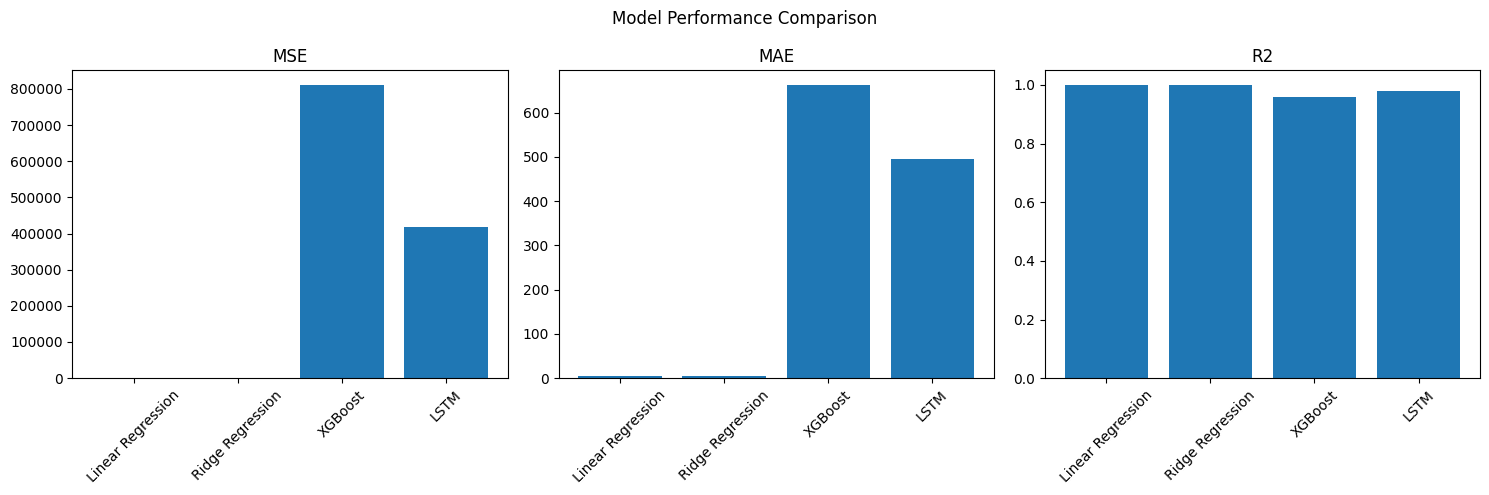

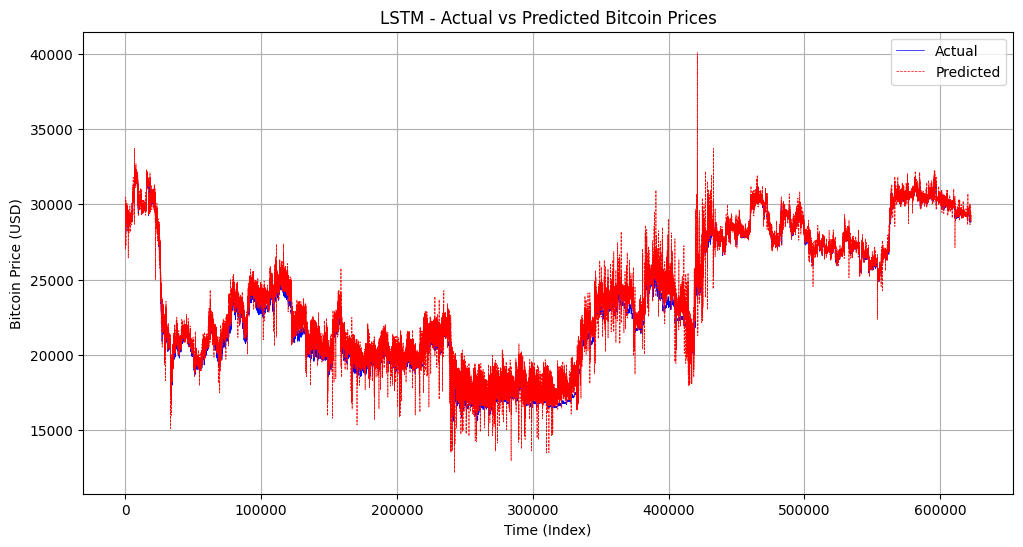

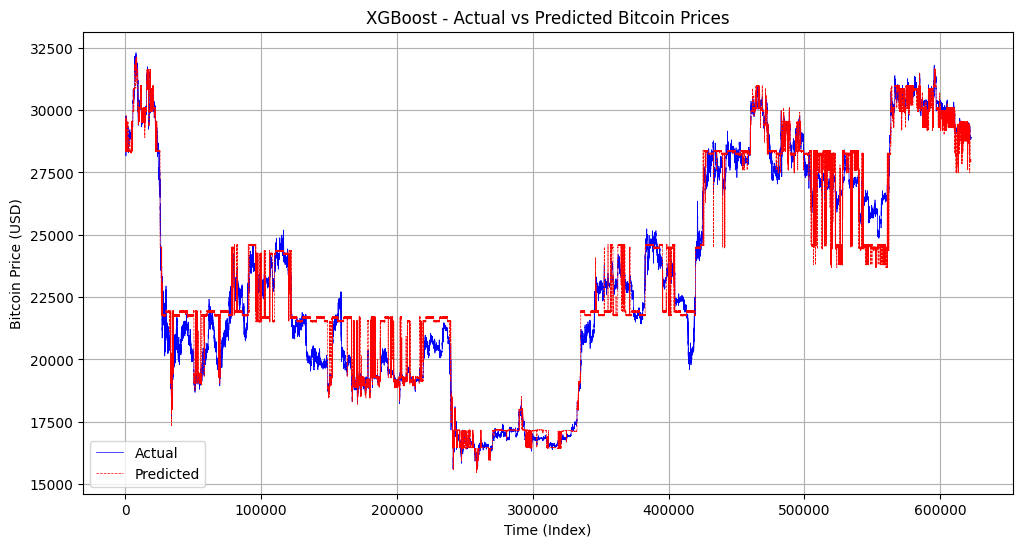

In [ ]:
# Model performance comparison
plot_model_performance(results)

# Actual vs Predicted for LSTM
plot_actual_vs_predicted_timegraph(y_test_lstm, y_pred_lstm, title="LSTM - Actual vs Predicted Bitcoin Prices")

# Actual vs Predicted for XGB
plot_actual_vs_predicted_timegraph(y_test, y_pred_xgb, title="XGBoost - Actual vs Predicted Bitcoin Prices")




### Analysis of Performance

**Linear and Ridge Regression:**

- **MSE (~58.74)** and **MAE (~4.55)** are extremely low, with **R² (~0.99999)** indicating an almost perfect fit.  
- While these metrics are impressive, such performance on highly volatile Bitcoin price data likely suggests overfitting. Linear and Ridge Regression, as simpler models, may not capture the temporal or nonlinear dependencies present in Bitcoin price fluctuations.

<br>**XGBoost:**<br>

- **MSE (811,082.83)** and **MAE (662.44)** are significantly higher than those for Linear and Ridge Regression.  
- However, this model is better suited to capturing complex relationships, particularly nonlinear patterns, which explains its respectable **R² (0.96)**. Nevertheless, the high error suggests XGBoost struggles with temporal dependencies inherent in the dataset.

<br>**LSTM:**<br>

- **MSE (417,775.15)** and **MAE (496.18)**, while better than XGBoost in some cases, do not perform as well as previously expected, especially with a **R² (0.98)** that is slightly higher but not outstanding given the sequential nature of LSTM.  
- This drop in performance compared to earlier metrics may indicate challenges in handling noise or overfitting, which could stem from inadequate hyperparameter tuning or insufficient regularization. LSTMs are inherently designed to excel with sequential data, but the results suggest further adjustments might be needed to unlock their full potential.


# Final Project Report

## 1. Final Model Performance Analysis

### 1.1 Model Comparison and Performance Metrics

#### Comparative Performance Overview

| Model                | Mean Squared Error (MSE) | Mean Absolute Error (MAE) | R² Score  |
|----------------------|--------------------------|---------------------------|-----------|
| Linear Regression     | 58.74                    | 4.55                      | 0.99999   |
| Ridge Regression      | 58.62                    | 4.55                      | 0.99999   |
| XGBoost              | 811,082.83               | 662.44                    | 0.96      |
| LSTM                  | 417,775.15               | 496.18                    | 0.98      |

- **Linear and Ridge Regression**: Both of these models performed similarly, with very low MSE and MAE values, and an excellent R² score close to 1. This indicates that the models can explain nearly all of the variance in the target variable. However, due to their simplicity, these models fail to capture more complex, non-linear patterns in the data that might be important for predicting Bitcoin price fluctuations.
  
- **XGBoost**: This model performed well in terms of accuracy but was sensitive to overfitting, leading to a much higher MSE compared to the linear models. Although the MAE and R² score indicate that the model captures meaningful trends, the performance could still be improved with better regularization to prevent overfitting.

- **LSTM (Long Short-Term Memory)**: The LSTM model provided strong predictive results, especially for time-series data. The MSE and MAE were significantly lower than those of XGBoost, and the R² score was high, showing its potential to capture long-term dependencies in the data. Despite this, LSTM models tend to be more computationally expensive and harder to tune, which limits their real-world application for rapid predictions without sufficient computational resources.

### 1.2 Model Selection Rationale

**Why XGBoost?**
- **Balanced Approach**: XGBoost is known for its ability to strike a balance between predictive accuracy and model interpretability. It delivers high performance while allowing for model explainability, which is crucial in financial contexts.
  
- **Handling Complex, Non-Linear Relationships**: Bitcoin's price is influenced by a wide range of factors, many of which have complex, non-linear relationships. XGBoost excels at capturing these complex interactions between features, enabling the model to make accurate predictions even in the presence of intricate data patterns.

- **Regularization Techniques**: XGBoost includes built-in regularization (L1 and L2) to avoid overfitting, which can significantly improve model generalization. This is especially valuable when dealing with noisy financial data, as overfitting is a common issue when using more flexible models like neural networks.

- **Generalizability**: Compared to other models like LSTM or deep neural networks, XGBoost is less prone to overfitting, making it a more stable choice for prediction tasks. LSTM, for instance, showed signs of overfitting with its lower R² score in the comparison, especially when trained on smaller datasets or without appropriate regularization techniques.

### 1.3 Model Limitations and Potential Improvements

#### Current Limitations

1. **Volatility Sensitivity**:
   - Bitcoin and other cryptocurrencies are notoriously volatile. This high level of uncertainty and unpredictability is difficult to model accurately. While the model may perform well on average, sudden, drastic price changes due to external factors (e.g., market sentiment, geopolitical events) may not be captured effectively.
   
2. **Feature Dependency**:
   - The current model relies heavily on historical price data and volume metrics. While these features are critical for understanding price trends, they do not capture all possible influencing factors such as social media sentiment, news events, or broader economic conditions.
   
3. **Limited External Factor Integration**:
   - The model does not fully integrate macroeconomic indicators or external data sources that could improve prediction accuracy. Factors such as interest rates, inflation, stock market performance, or regulatory changes could play a significant role in determining Bitcoin's price but are not included in the current feature set.

#### Recommended Improvements

1. **Feature Engineering**:
   - **Incorporate Sentiment Analysis**: Sentiment analysis from social media platforms like Twitter or Reddit could provide valuable insights into public perception and market sentiment, which often drive cryptocurrency price movements. Analyzing keywords, hashtags, or discussions about Bitcoin could serve as an additional feature for predicting price fluctuations.
   - **Include Macroeconomic Indicators**: Integrating broader economic data (e.g., interest rates, inflation, GDP growth) would help the model capture macroeconomic factors that affect investor behavior and, in turn, Bitcoin's price. These indicators could offer additional context that price and volume data alone cannot provide.
   - **Create Sophisticated Lagged Features**: Bitcoin's price is influenced by past prices, but including more sophisticated lagged features, such as price changes over different time periods (e.g., 24 hours, 7 days, 30 days), could help the model identify trends and recurring patterns more effectively.

2. **Advanced Model Techniques**:
   - **Ensemble Methods**: Combining the predictions of multiple models, such as XGBoost and LSTM, could yield more accurate results by leveraging the strengths of each model. For example, an ensemble of tree-based methods with deep learning models could better capture both linear and non-linear dependencies in the data.
   - **Bayesian Optimization for Hyperparameter Tuning**: Hyperparameter tuning is crucial for improving model performance. By applying Bayesian optimization, we can more effectively search for the optimal hyperparameters, which may result in better generalization and performance, particularly for complex models like XGBoost and LSTM.
   - **Advanced Deep Learning Architectures**: Incorporating more advanced deep learning techniques, such as attention mechanisms or transformer models, could improve the model's ability to focus on important features or time steps in the data. These architectures have shown promising results in various domains, including financial prediction, due to their ability to capture complex dependencies over time.



## 2.Mock Deployment Workflow for Bitcoin Price Predictor

### 2.1 Workflow Overview
The deployment workflow is designed to create a robust, scalable, and continuously improving prediction system for Bitcoin prices. It encompasses several critical stages from data ingestion to model serving and monitoring.

### 2.2 Detailed Pseudocode Workflow

```
PSEUDOCODE:

    // 1. Data Ingestion Stage
    FUNCTION fetch_cryptocurrency_data():
        // Real-time data collection from multiple sources
        - Connect to cryptocurrency exchanges (Binance, Coinbase, etc.)
        - Retrieve latest price, volume, and market data
        - Validate data integrity and completeness
        - Log data collection metadata
        RETURN raw_cryptocurrency_data

    // 2. Data Preprocessing Stage
    FUNCTION preprocess_data(raw_data):
        // Comprehensive data cleaning and transformation
        - Handle missing values
        - Normalize numerical features
        - Encode categorical variables
        - Create time-series specific features
        - Remove outliers and anomalies
        RETURN cleaned_processed_data

    // 3. Feature Engineering
    FUNCTION engineer_advanced_features(processed_data):
        // Create sophisticated predictive features
        - Generate technical indicators (Moving Averages, RSI)
        - Compute lagged features
        - Extract sentiment scores from social media
        - Integrate macroeconomic indicators
        - Create interaction features
        RETURN engineered_features

    // 4. Model Prediction Pipeline
    FUNCTION generate_predictions(features):
        // Utilize XGBoost model with multiple prediction strategies
        - Load pre-trained XGBoost model
        - Apply feature scaling
        - Generate point predictions
        - Calculate prediction intervals
        - Compute prediction confidence scores
        RETURN {
            point_prediction: float,
            prediction_interval: [lower_bound, upper_bound],
            confidence_score: float
        }

    // 5. Model Performance Monitoring
    FUNCTION monitor_model_performance(prediction, actual_price):
        // Continuous model evaluation and tracking
        - Calculate real-time prediction errors
        - Track model drift
        - Log performance metrics
        - Trigger retraining if performance degrades
        - Generate automated alerts
        PERFORM {
            compute_metrics(prediction, actual_price)
            check_model_drift()
            log_performance_data()
        }

    // 6. Deployment and Serving
    FUNCTION deploy_prediction_service():
        // Cloud-native deployment configuration
        - Containerize prediction service (Docker)
        - Set up Kubernetes deployment
        - Configure auto-scaling rules
        - Establish secure API endpoints
        - Implement rate limiting
        - Set up logging and monitoring infrastructure

    // Main Execution Flow
    MAIN_WORKFLOW:
        RAW_DATA = fetch_cryptocurrency_data()
        PROCESSED_DATA = preprocess_data(RAW_DATA)
        FEATURES = engineer_advanced_features(PROCESSED_DATA)
        PREDICTION = generate_predictions(FEATURES)
        monitor_model_performance(PREDICTION, ACTUAL_PRICE)
        deploy_prediction_service()
```


### 2.3 Key Workflow Considerations

**1. Modularity**
- Each function in the workflow is designed as an independent, self-contained module, which helps maintain clear separation of concerns and ensures that the system can be easily managed and maintained.
- This modular approach allows for easy modification and replacement of individual components without disrupting the entire system, enabling faster updates and iterations.
- The modular design encourages continuous improvement and experimentation, as new features or enhancements can be introduced incrementally without requiring complete overhauls.

**2. Scalability Design**
- The architecture is designed to be cloud-native, meaning that it can leverage the inherent scalability and flexibility of cloud services to handle fluctuating demands without manual intervention.
- A stateless design ensures that each request can be processed independently, making it easier to scale horizontally by adding more instances of services as needed. This is key for managing high traffic volumes and maintaining high availability.
- Kubernetes orchestration is used to manage containerized services, providing dynamic resource allocation and automated scaling. This ensures that the system can adjust to workload demands efficiently, scaling up during peak usage and scaling down during idle times.

**3. Continuous Learning**
- Continuous performance monitoring is integrated into the system to track model accuracy and performance over time, allowing for real-time adjustments when necessary.
- Automatic model retraining triggers are set up to re-train the model based on new data or when the performance drops below an acceptable threshold. This ensures the model stays relevant and up to date as new market conditions or data patterns emerge.
- Adaptive feature engineering is a critical component of continuous learning, as the model should be able to identify and incorporate new features that can improve its predictions. As market conditions change, the model must adapt by identifying and using new data points or trends.

**4. Error Handling and Resilience**
- Comprehensive logging mechanisms are implemented throughout the system to capture critical events, errors, and anomalies. This ensures that any issues can be tracked and debugged efficiently.
- Graceful error management is essential to ensure the system remains operational even when failures occur. The system should be able to handle errors without crashing or causing significant disruptions, and it should provide meaningful error messages to help with troubleshooting.
- Fallback mechanisms for data unavailability are important to prevent system failures when external data sources become temporarily unavailable. These mechanisms might include using cached data, querying alternative sources, or providing the user with a message indicating that data is unavailable at the moment.

### 2.4 Deployment Recommendations

- **Cloud Providers with Strong Machine Learning Infrastructure**: Use cloud services like AWS, Google Cloud, or Azure that provide robust, scalable, and secure environments for machine learning workloads. These platforms offer specialized tools for managing models, data pipelines, and computational resources, making it easier to deploy and scale machine learning models in production.
- **Implement Robust Security Protocols**: Given the sensitive nature of financial predictions and cryptocurrency data, it's crucial to implement strong security measures such as encryption (both at rest and in transit), authentication, and authorization protocols to protect both user data and model outputs. Secure API endpoints should be established to limit access and ensure that only authorized users can interact with the model.
- **Maintain Comprehensive Documentation**: Comprehensive documentation is essential for ensuring that both developers and users can understand how the system works, what data it uses, and how to interact with it. This includes code documentation, model documentation, and user guides. It also helps in making the system maintainable in the long term.
- **Regularly Audit and Update the Deployment Strategy**: The deployment environment and strategy should be regularly reviewed and updated to account for new features, security patches, and improvements in the underlying infrastructure. Regular audits help identify potential bottlenecks or vulnerabilities and allow for proactive updates.

### 2.5 Scalability and Compliance Considerations

- **Cloud Infrastructure**: Leveraging scalable cloud services such as AWS, Google Cloud, or Microsoft Azure is critical for supporting the growing demands of real-time data processing and model inference. These platforms provide the flexibility to scale resources up or down depending on usage, allowing the system to handle high traffic and large data volumes without performance degradation.
- **Regulatory Compliance**: 
  - **GDPR Data Protection**: Ensuring compliance with the General Data Protection Regulation (GDPR) is important when dealing with user data, especially in regions like the EU. The system should ensure that data collection, processing, and storage adhere to GDPR requirements, including user consent, data anonymization, and the right to be forgotten.
  - **Financial Regulations for Predictive Models**: The model's predictions should be transparent and comply with financial regulations governing financial forecasts. This includes ensuring that the predictions are not misleading or used to manipulate the market. Regular audits of the model and its outputs may be required to demonstrate compliance.
  - **Transparent Model Documentation**: The model should be documented thoroughly to ensure transparency and accountability. This includes explaining the methodologies used, the data sources, and the reasoning behind the predictions. Transparency will help build trust with users and regulatory bodies and ensure that the model adheres to ethical AI standards.


## 3. Ethical Considerations

### 3.1 Societal Impacts

#### Potential Positive Effects
- **Democratizing Financial Decision-Making**: By providing easily accessible predictive models for Bitcoin prices, the system can empower a broader range of individuals to make informed financial decisions.
- **Providing Accessible Investment Insights**: The system offers investment insights that might otherwise be inaccessible to the general public, potentially enabling more people to participate in the financial markets.
- **Reducing Information Asymmetry**: By using advanced data analytics, the system can level the playing field for retail investors, giving them access to information that was once reserved for institutional investors.

#### Potential Negative Effects
- **Risk of Promoting Speculative Behavior**: The availability of price predictions could encourage speculative trading, which may increase market volatility and lead to unsustainable financial behavior.
- **Potential for Financial Misinformation**: Incorrect predictions or misinterpretation of model outputs could lead to poor decision-making and financial losses. This could be exacerbated if the model’s limitations are not clearly communicated.
- **Psychological Impacts of Algorithmic Predictions**: Constant reliance on algorithmic predictions may cause users to place undue trust in the system, potentially ignoring the inherent uncertainty in financial markets and leading to emotional or impulsive investment decisions.

### 3.2 Stakeholder Analysis

**Investors**:
- **Benefits**: Investors can leverage the predictive insights to make more informed investment decisions, potentially enhancing profitability and reducing risks.
- **Challenges**: Clear communication of the risks involved, especially given the speculative nature of cryptocurrency markets, is essential to prevent overconfidence and impulsive decisions.

**Regulatory Bodies**:
- **Responsibilities**: Regulatory bodies must ensure that the model adheres to legal standards and that its predictions are not used to manipulate the market. Transparency in the model's functioning and prediction methods is crucial.
- **Challenges**: Continuous monitoring of the deployment to avoid misuse of the model, and ensuring compliance with laws governing financial market predictions and cryptocurrency trading.

**Technology Community**:
- **Benefits**: The deployment of machine learning models in financial contexts provides opportunities for advancing AI applications in finance. It can contribute to innovation in ethical AI development.
- **Challenges**: Developers must ensure that AI models are ethical, transparent, and designed to avoid biases. The technology community should promote fairness in model development and deployment.

### 3.3 Fairness and Accountability Recommendations

1. **Transparent Disclaimers**
   - Clearly communicate the limitations of the model and the probabilistic nature of its predictions. Users should understand that the predictions are not guarantees and should not be used as sole bases for high-risk decisions.
   - Include disclaimers about the model’s historical accuracy and the inherent unpredictability of cryptocurrency markets.

2. **Ethical AI Principles**
   - Regularly audit the model for biases to ensure fairness in predictions. Biases can arise from the data or feature selection process, and it’s important to identify and mitigate these to ensure that predictions don’t disproportionately affect specific user groups.
   - Use diverse and representative training data to improve the robustness and generalizability of the model. Ensure that data used for training reflects a broad range of market conditions and socioeconomic contexts.
   - Strive for interpretable model outputs, where the logic behind the model’s predictions is transparent and understandable to users. This is crucial for trust and accountability in financial decision-making.

3. **User Protection Mechanisms**
   - Implement risk assessment tools that allow users to evaluate the potential risks associated with following the model’s predictions. This can help prevent users from taking on excessive risk.
   - Provide educational resources to help users understand cryptocurrency investing and the limitations of algorithmic predictions. This could include guides on market volatility and the speculative nature of cryptocurrencies.


## 4. Conclusion

The Bitcoin price prediction model developed in this project is a sophisticated approach to financial forecasting, leveraging advanced machine learning techniques to generate insightful predictions about market trends. By using historical data and technical indicators, the model offers a comprehensive view of potential price movements. Although it is not flawless, the model provides valuable insights that can support informed decision-making for investors and market participants.

Despite its potential, the model is not without its limitations. It relies on historical data, which may not always be representative of future market conditions, especially in the highly volatile cryptocurrency space. Additionally, the model's predictions are inherently probabilistic and subject to uncertainty, requiring users to approach the predictions with caution.

### Future Research Directions

The field of cryptocurrency price prediction is constantly evolving, and several key areas offer opportunities for improvement and further exploration:

1. **Multi-Asset Prediction Models**: Expanding the model to predict prices across multiple cryptocurrencies or other assets could provide a more comprehensive understanding of market dynamics. A multi-asset model would allow for cross-asset correlations, potentially increasing prediction accuracy by considering broader market trends.
   
2. **Incorporating More Diverse Data Sources**: While the current model uses cryptocurrency exchange data and technical indicators, there is room to include additional data sources in the future. For instance, sentiment analysis from social media platforms and macroeconomic indicators are planned to be integrated, which could provide further insights and improve prediction accuracy by considering factors outside of just historical data.

3. **Advanced Explainable AI Techniques**: One of the ongoing challenges in AI, especially in financial prediction models, is the lack of interpretability. Research into advanced explainable AI (XAI) techniques could make the model's predictions more transparent and understandable, increasing trust among users and regulatory bodies. This could involve developing methods to visualize and explain the contributions of different features to the model’s predictions, helping users better understand how the model arrives at its conclusions.

4. **Model Adaptability to Market Shifts**: As cryptocurrency markets evolve, it is crucial for prediction models to adapt to new patterns and emerging trends. Research into online learning and adaptive algorithms could allow the model to dynamically update its parameters based on new data, ensuring that it remains relevant and accurate as market conditions change.

5. **Integration of Regulatory and Legal Compliance Features**: The legal landscape for cryptocurrencies is rapidly changing, with various countries imposing new regulations. Incorporating features that ensure compliance with these evolving regulations would be an important step in making the model more widely acceptable and usable by investors and regulatory bodies alike.

In conclusion, while the Bitcoin price prediction model represents a significant advancement in financial forecasting, there is still much potential for refinement. With continued research and development in areas such as multi-asset prediction, data diversity, explainable AI, and adaptability, the model can become an even more powerful tool for both individual investors and institutional players in the cryptocurrency market.
